<a href="https://colab.research.google.com/github/GAURAV-AgarwL/-Predicting-Listing-Gains-in-the-IPO-Market/blob/main/bank__loan_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data = pd.read_csv('bankloan.csv')
sns.set(style="whitegrid")


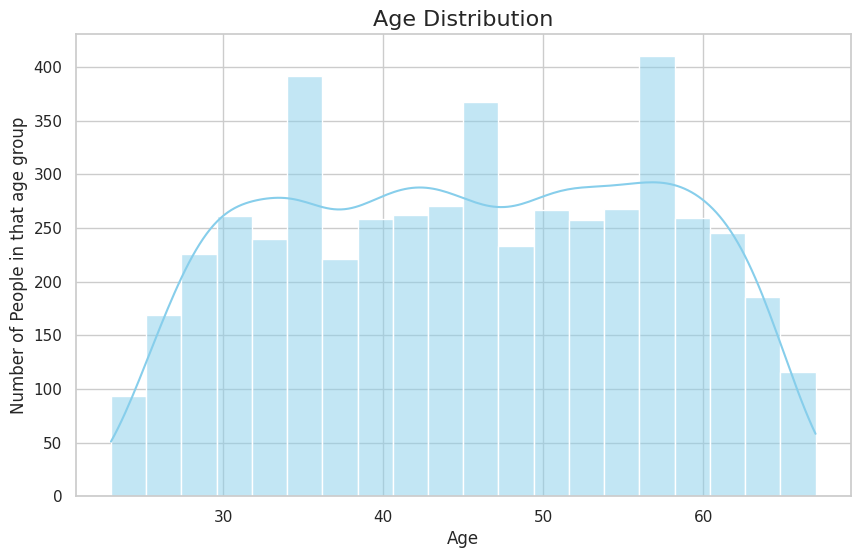

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People in that age group', fontsize=12)
plt.show()


In [ ]:
#plt.figure(figsize=(10, 6))
#sns.boxplot(x='Personal.Loan', y='Income', data=data, palette="viridis")
#plt.title('Income vs Personal Loan Acceptance', fontsize=16)
#plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=12)
#plt.ylabel('Income (in thousands)', fontsize=12)
#plt.show()

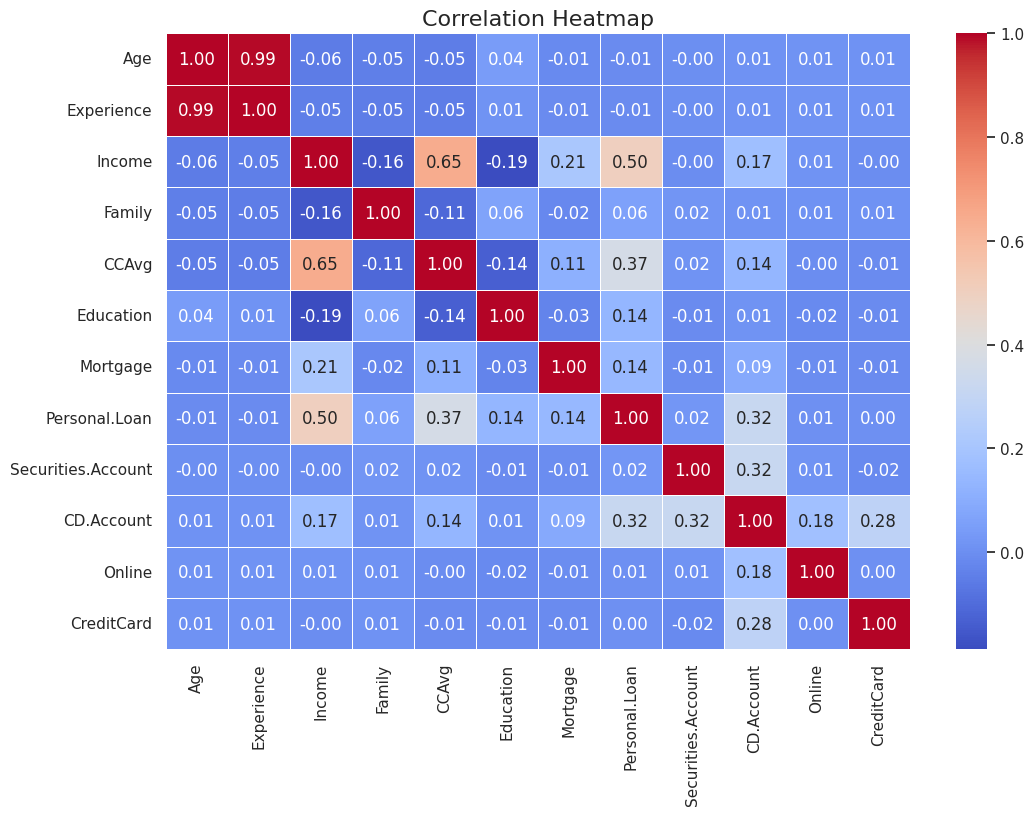

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = data.drop(columns=['ID', 'ZIP.Code']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
X = data.drop(columns=['ID', 'ZIP.Code', 'Personal.Loan'])
y = data['Personal.Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rep = classification_report(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", rep)
print("\nConfusion Matrix:\n", cnf_matrix)


Accuracy: 0.9893333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.90      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500


Confusion Matrix:
 [[1342    1]
 [  15  142]]
